In [35]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

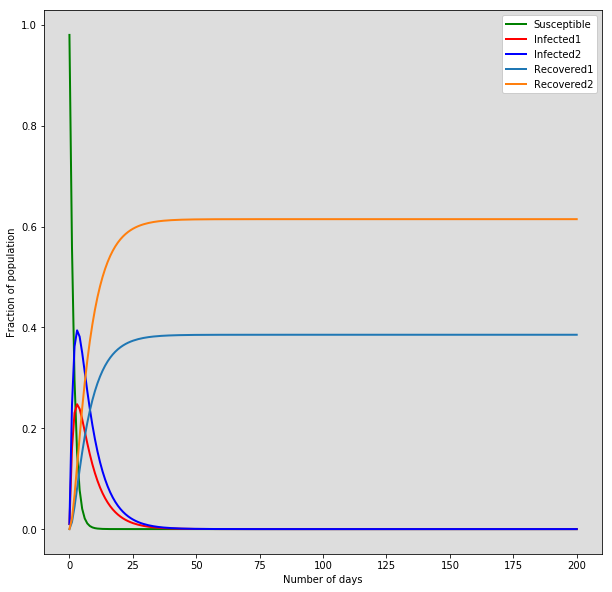

In [119]:
def model(z,t,beta1,beta2,gamma1,gamma2,u1w,u1r,u2w,u2r):
    s,i1,i2,r1,r2=z
    dsdt=-((beta1+u1w)*i1 +(beta2+u2w)*i2 + u1r +u2r)*s
    di1dt=(beta1+u1w)*i1*s+u1r*s-gamma1*i1
    di2dt=(beta2+u2w)*i2*s + u2r*s -gamma2*i2
    dr1dt=gamma1*i1
    dr2dt=gamma2*i2
    
    return [dsdt,di1dt,di2dt,dr1dt,dr2dt]

cnsts = [0.2,0.2,0.15,0.15]  # the growth and recovery rates assumed equal
strategySetA=[[0.0,0.2],[0.15,0.15],[0.2,0.1]]
strategySetB=[[0.1,0.3],[0.2,0.2],[0.3,0.1]]

#initial conditions
i10=1.0/100 
i20=i10
r10=0
r20=r10
s0=1-i10-i20-r10-r20
z0=[s0,i10,i20,r10,r20]

tSpan =np.linspace(0,200,200)
solSet=[]

for i in range(3):
    for j in range(3):
        result  = scipy.integrate.odeint(model,z0,tSpan,args=(cnsts[0],cnsts[1],cnsts[2],cnsts[3],strategySetA[i][0],strategySetA[i][1],strategySetB[j][0],strategySetB[j][1]))
        solSet.append(result)
    
solSet = np.array(solSet)

fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,facecolor='#DDDDDD')
ax.plot(tSpan,solSet[0][0:,0],'g',lw=2,label='Susceptible')
ax.plot(tSpan,solSet[0][0:,1],'r',lw=2,label='Infected1')
ax.plot(tSpan,solSet[0][0:,2],'b',lw=2,label='Infected2')
ax.plot(tSpan,solSet[0][0:,3],lw=2,label='Recovered1')
ax.plot(tSpan,solSet[0][0:,4],lw=2,label='Recovered2')
ax.set_xlabel('Number of days')
ax.set_ylabel('Fraction of population')
legend=ax.legend()   #legend object has to be created to observe the labels
legend.get_frame().set_alpha(1)  #setting the opacity of the legend frame
plt.show()

## currently cost functions were found through explicit data entry.
df_sol1=pd.DataFrame(data=solSet[8],columns=["susceptible","infected1","infected2","recovered1","recovered2"])
df_sol1['Time']=tSpan
df_sol1['cost func 1']=-(df_sol1['infected1']+df_sol1['recovered1'])+(strategySetA[2][0]+strategySetA[2][1])*df_sol1['Time']
df_sol1['cost func 2']=-(df_sol1['infected2']+df_sol1['recovered2'])+(strategySetB[2][0]+strategySetB[2][1])*df_sol1['Time']


## Payoff table is constructed by looking at the cost function at time=200

In [120]:
df_sol1.head()

,susceptible,infected1,infected2,recovered1,recovered2,Time,cost func 1,cost func 2
0,0.980000,0.010000,0.010000,0.000000,0.000000,0.000000,-0.010000,-0.010000
1,0.758373,0.108793,0.114412,0.009054,0.009368,1.005025,0.183660,0.278230
2,0.537854,0.189625,0.206758,0.031884,0.033879,2.010050,0.381506,0.563383
3,0.357223,0.239839,0.268152,0.064664,0.070122,3.015075,0.600019,0.867757
4,0.228852,0.260043,0.295433,0.102677,0.112996,4.020101,0.843311,1.199611


In [ ]:
payoff = {'S2a':[(39.61,79.38),(59.54,79.45),(59.41,79.58)],'S2b':[(39.65,79.34),(59.58,79.41),(59.44,79.55)],'S2c':[(39.72,79.27),(59.65,79.34),(59.53,79.46)]}


df_payoff = pd.DataFrame(data=payoff,index={'S1a','S1b','S1c'})

## Payoff table

In [97]:
df_payoff.head()

,S2a,S2b,S2c
S1a,"(39.61, 79.38)","(39.65, 79.34)","(39.72, 79.27)"
S1c,"(59.54, 79.45)","(59.58, 79.41)","(59.65, 79.34)"
S1b,"(59.41, 79.58)","(59.44, 79.55)","(59.53, 79.46)"
